In [13]:
import pandas as pd

# Drive'daki CSV dosyasının doğru yolu
dosya_yolu = "/content/drive/My Drive/colab_data/netflix_titles.csv"

# CSV dosyasını oku
df = pd.read_csv(dosya_yolu)

# İlk 5 satıra göz atalım
df.head()






,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [14]:
df.shape

(8807, 12)

In [15]:
df.dtypes

,0
show_id,object
type,object
title,object
director,object
cast,object
country,object
date_added,object
release_year,int64
rating,object
duration,object


In [16]:
df.isnull().sum()


,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [17]:
df['country'].value_counts().head(10)


,count
country,
United States,2818
India,972
United Kingdom,419
Japan,245
South Korea,199
Canada,181
Spain,145
France,124
Mexico,110


In [18]:
df['type'].value_counts()



,count
type,
Movie,6131
TV Show,2676


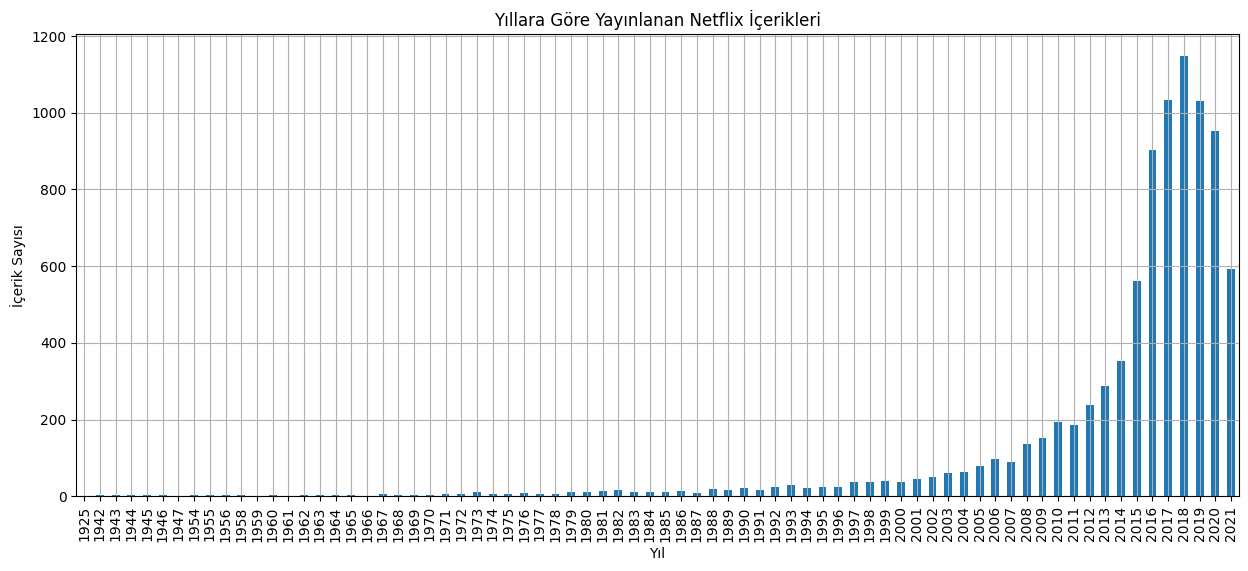

In [19]:
import matplotlib.pyplot as plt

# Yıllara göre içerik sayısı
df['release_year'].value_counts().sort_index().plot(kind='bar', figsize=(15,6))
plt.title("Yıllara Göre Yayınlanan Netflix İçerikleri")
plt.xlabel("Yıl")
plt.ylabel("İçerik Sayısı")
plt.grid(True)
plt.show()


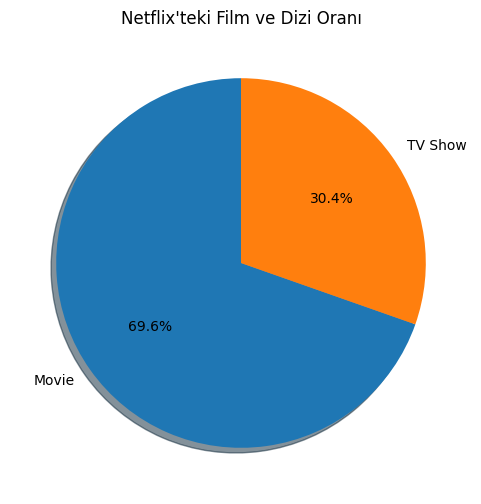

In [20]:
df['type'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, shadow=True, figsize=(6,6))
plt.title("Netflix'teki Film ve Dizi Oranı")
plt.ylabel("")
plt.show()


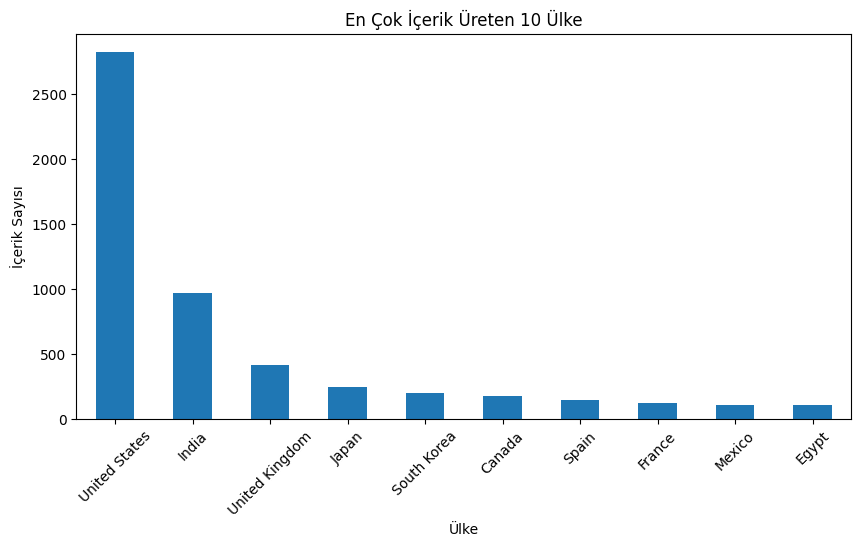

In [21]:
df['country'].value_counts().head(10).plot(kind='bar', figsize=(10,5))
plt.title("En Çok İçerik Üreten 10 Ülke")
plt.xlabel("Ülke")
plt.ylabel("İçerik Sayısı")
plt.xticks(rotation=45)
plt.show()


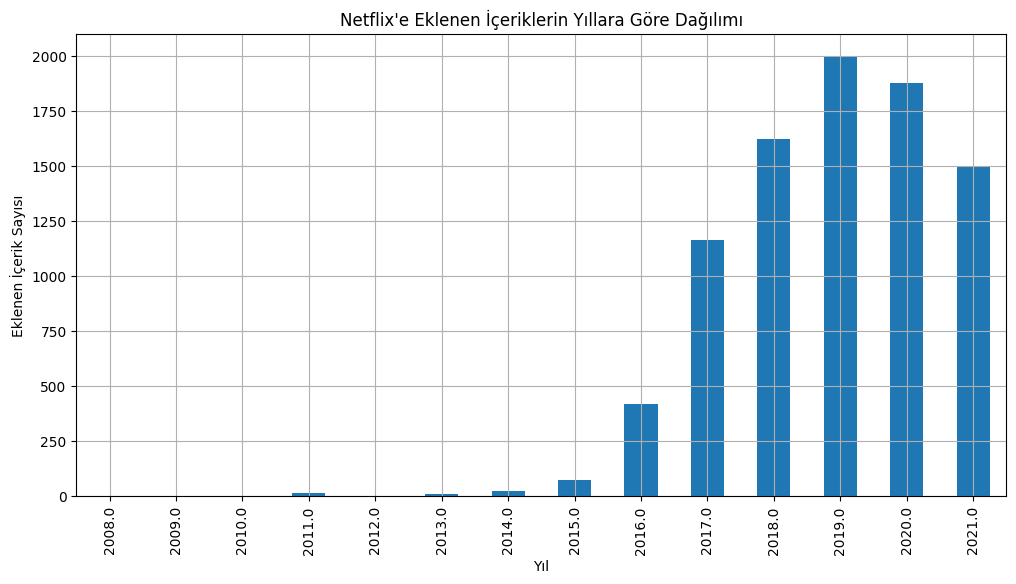

In [24]:
# Hatalı tarihleri NaT (eksik) olarak işaretle
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Sonra yıllara göre say
df['date_added'].dt.year.value_counts().sort_index().plot(kind='bar', figsize=(12,6))
plt.title("Netflix'e Eklenen İçeriklerin Yıllara Göre Dağılımı")
plt.xlabel("Yıl")
plt.ylabel("Eklenen İçerik Sayısı")
plt.grid(True)
plt.show()
